In [0]:
# Please try to copy this notebook to your own google drive.
# You can leverage Google's cloud-based machine to execute the following codes.
# Google provides several runtimes.

# "Runtime" -> "Change runtime type"
# Make sure you use "Python 3" because 2.x will not be maintained past 2020.
# You may select "GPU" from the Hardware Accelerator drop-down.

# The following codes demonstrate the time difference between using CPU and GPU.

# https://www.tensorflow.org/guide/gpu

In [1]:
import tensorflow as tf

try:
  # Specify an invalid GPU device
  with tf.device('/device:GPU:0'):
    print('GPU exists')
except RuntimeError as e:
  print(e)

GPU exists


In [2]:
try:
  # Specify an invalid GPU device
  with tf.device('/device:CPU:0'):
    print('CPU exists')
except RuntimeError as e:
  print(e)

CPU exists


### CPU vs GPU

In [0]:
# A simple function for performance testing

import time

def performanceTest(device_name, size):
    with tf.device(device_name):
        W = tf.random_normal([size, size], name = 'W')
        X = tf.random_normal([size, size], name = 'X')
        mul = tf.matmul(W, X, name = 'mul')
        sum_result = tf.reduce_sum(mul, name = 'sum')
    
    startTime = time.time()
    tfconfig = tf.ConfigProto(log_device_placement = True)
    with tf.Session(config = tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes = time.time() - startTime
    print(device_name, "size=", size, "Time:", takeTimes)
    return takeTimes

In [4]:
gpu_li = []
cpu_li = []
x_li = []

for x in range(0, 4001, 500):
    g = performanceTest("/device:GPU:0", x) #  <---- check device name
    c = performanceTest("/device:CPU:0", x) # <---- check device name
    x_li.append(x)
    gpu_li.append(g)
    cpu_li.append(c)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

/device:GPU:0 size= 0 Time: 9.210452556610107
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

/device:CPU:0 size= 0 Time: 0.028955936431884766
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability

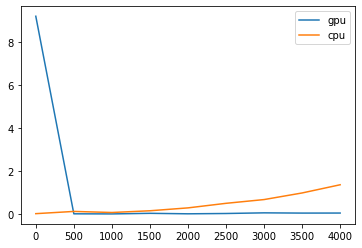

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_li, gpu_li, label = 'gpu')
plt.plot(x_li, cpu_li, label = 'cpu')
plt.legend()